# CRISP Metrics DATA SCIENCE INTERNSHIP:

# NAME:Parul Singh R

# Perform Data analysis and use different machine learning algorithms.

• Compare at least 3 different Algorithms and show their accuracies
with the help of graph

Dataset link:https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
df = pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
# Getting a basic statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Checking for null values
df.isnull().values.any()

False

In [7]:
df.shape

(768, 9)

In [8]:
# Finding the correlations
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [46]:
# Split the data to feature and target values
X = df.iloc[:, 1:].values
Y = df.iloc[:, 8].values

In [62]:
Y.shape

(768,)

In [63]:
X.shape

(768, 8)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [66]:
len(X_test)

192

In [67]:
len(Y_test)

192

In [68]:
len(X_train)

576

In [69]:
len(Y_train)

576

In [79]:
#creating list for acuracy values and model names:
acc = []
model = []

# Support Vector Machine:

In [80]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
SVM = SVC(gamma='auto')
SVM.fit(X_train,Y_train)
predicted_values = SVM.predict(X_test)
s = metrics.accuracy_score(Y_test,predicted_values)
acc.append(s)
model.append('SVM')
print("Test accuracy : {:2f}%".format(SVM.score(X_test, Y_test) * 100 ))

Test accuracy : 67.708333%


# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train,Y_train)

#Predict Output
predicted= KNN.predict(X_test) 
k = KNN.score(X_test,Y_test)
acc.append(k)
model.append('KNN')
print("Test accuracy : {:2f}%".format(KNN.score(X_test, Y_test) * 100 ))

Test accuracy : 70.833333%


# LINEAR DISCRIMINATE ANALYSIS

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
door = LDA.predict(X_test)
b = LDA.score(X_test,Y_test)
acc.append(b)
model.append('LDA')
print("Test accuracy : {:2f}%".format(LDA.score(X_test, Y_test) * 100))

Test accuracy : 78.645833%


# Ploting acuracy of all models:

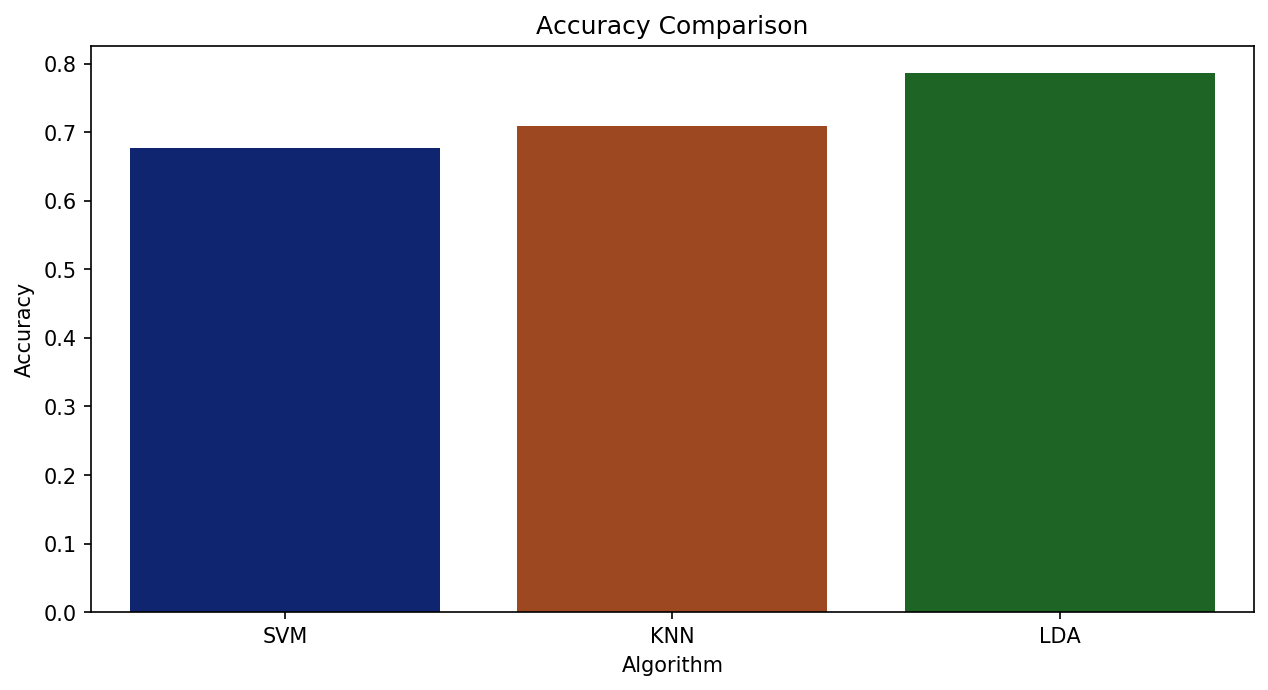

In [83]:
plt.figure(figsize = [10,5], dpi = 150)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc, palette='dark')

# Conclusion:

Linear Discriminate Analysis Model suites best for this diabetes dataset problem.

# Thank you